## Inequalities in Health in England

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import re
import folium

### Data Gathering

In [2]:
if False:
    url_local_health="https://wpieconomics.us13.list-manage.com/track/click?u=5331abc1c0dacc833dd4e807b&id=645de758bb&e=9f29c59835.csv"
    multiple_deprivation='https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833970/File_1_-_IMD2019_Index_of_Multiple_Deprivation.xlsx'
    urls=[url_local_health,multiple_deprivation]
    for url in urls:
        response=requests.get(url)
        with open(url.split(".")[2]+"."+url.split(".")[-1],'wb') as file:
            file.write(response.content)

In [3]:
life_exp_df=pd.read_csv('list-manage.csv')
imd_df=pd.read_excel("service.xlsx",sheet_name="IMD2019")

### Pre-loading dataset 1

In [4]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6793 entries, 0 to 6792
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Local Health - Office for Health Improvement and Disparities  6793 non-null   object
 1                                                                 6793 non-null   object
 2    .1                                                           6737 non-null   object
 3    .2                                                           6774 non-null   object
dtypes: object(4)
memory usage: 212.4+ KB


#### Pre-loadong  dataset 2

In [5]:
imd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   LSOA code (2011)                            32844 non-null  object
 1   LSOA name (2011)                            32844 non-null  object
 2   Local Authority District code (2019)        32844 non-null  object
 3   Local Authority District name (2019)        32844 non-null  object
 4   Index of Multiple Deprivation (IMD) Rank    32844 non-null  int64 
 5   Index of Multiple Deprivation (IMD) Decile  32844 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


## Data Acessment

#### Assessing dataset 1

In [6]:
life_exp_df.head()

,Local Health - Office for Health Improvement and Disparities,,.1,.2
0,Geographical references: MSOA 2011 (Middle lev...,,,
1,Code,Label,Life expectancy at birth for males,Life expectancy at birth for females
2,E02000001,City of London 001,91.1,90.2
3,E02000002,Barking and Dagenham 001,79.5,82.5
4,E02000003,Barking and Dagenham 002,78.1,84.2


In [7]:
life_exp_df.columns

Index(['Local Health - Office for Health Improvement and Disparities', ' ',
       ' .1', ' .2'],
      dtype='object')

##### Outcome of Assessing the Dataset 1
- tidy up data table- life expectancy in a single column
- Remove the title
- city code to another column
- rename columns
- Treat NaN values
- Strip the city code of the city label
- remove NaN for life expectancy at birth- that's the independent variable

### Assessing dataset 2

In [8]:
imd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   LSOA code (2011)                            32844 non-null  object
 1   LSOA name (2011)                            32844 non-null  object
 2   Local Authority District code (2019)        32844 non-null  object
 3   Local Authority District name (2019)        32844 non-null  object
 4   Index of Multiple Deprivation (IMD) Rank    32844 non-null  int64 
 5   Index of Multiple Deprivation (IMD) Decile  32844 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [9]:
imd_df.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank,Index of Multiple Deprivation (IMD) Decile
0,E01000001,City of London 001A,E09000001,City of London,29199,9
1,E01000002,City of London 001B,E09000001,City of London,30379,10
2,E01000003,City of London 001C,E09000001,City of London,14915,5
3,E01000005,City of London 001E,E09000001,City of London,8678,3
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,14486,5


### Assessing dataset2
- drop LOSA code (2011) & LSOA name (2011) columns
- rename columns
- Convert IMD rank to integer
- convert IMD Decile to integer

## Data Cleaning

In [10]:
expectancy_df=life_exp_df.copy()
deprivation_df=imd_df.copy()

### Dataset 1
 Delete the first two rows and rename columns

In [11]:
header=["area_id","city","male_life_expectancy","female_life_expectancy"]

In [12]:
expectancy_df=expectancy_df.iloc[2:]
expectancy_df.columns=header
expectancy_df

,area_id,city,male_life_expectancy,female_life_expectancy
2,E02000001,City of London 001,91.1,90.2
3,E02000002,Barking and Dagenham 001,79.5,82.5
4,E02000003,Barking and Dagenham 002,78.1,84.2
5,E02000004,Barking and Dagenham 003,77.6,81.8
6,E02000005,Barking and Dagenham 004,79.2,84.6
...,...,...,...,...
6788,E02006930,Greenwich 037,80.8,82.8
6789,E02006931,Greenwich 038,79.6,83.9
6790,E02006932,Liverpool 060,73.4,78.7
6791,E02006933,Liverpool 061,77,84.3


In [13]:
splited_df=expectancy_df.city.str.split(r'(\d+)', expand=True,regex=True,)
splited_df.columns=["city","area_code","empty_column"]
print(splited_df.empty_column.value_counts())


    6791
Name: empty_column, dtype: int64


In [14]:
expectancy_df.drop('city',axis=1,inplace=True)

In [15]:
expectancy_df['city']=splited_df['city']
expectancy_df['area_code']=splited_df['area_code']
expectancy_df.reset_index(drop=True,inplace=True)
expectancy_df=expectancy_df[['area_id','area_code','city',"male_life_expectancy","female_life_expectancy"]]
expectancy_df.head()

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
0,E02000001,001,City of London,91.1,90.2
1,E02000002,001,Barking and Dagenham,79.5,82.5
2,E02000003,002,Barking and Dagenham,78.1,84.2
3,E02000004,003,Barking and Dagenham,77.6,81.8
4,E02000005,004,Barking and Dagenham,79.2,84.6


In [16]:
#convert life expectancy to type float
expectancy_df.male_life_expectancy=expectancy_df.male_life_expectancy.astype(float)
expectancy_df.female_life_expectancy=expectancy_df.female_life_expectancy.astype(float)

In [17]:
expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 6791 non-null   object 
 1   area_code               6791 non-null   object 
 2   city                    6791 non-null   object 
 3   male_life_expectancy    6735 non-null   float64
 4   female_life_expectancy  6772 non-null   float64
dtypes: float64(2), object(3)
memory usage: 265.4+ KB


### Treat NaN values

In [18]:
expectancy_df.isnull().sum()

area_id                    0
area_code                  0
city                       0
male_life_expectancy      56
female_life_expectancy    19
dtype: int64

In [19]:
expectancy_df.head()

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
0,E02000001,001,City of London,91.1,90.2
1,E02000002,001,Barking and Dagenham,79.5,82.5
2,E02000003,002,Barking and Dagenham,78.1,84.2
3,E02000004,003,Barking and Dagenham,77.6,81.8
4,E02000005,004,Barking and Dagenham,79.2,84.6


In [20]:
expectancy_df.city=expectancy_df.city.str.strip()
expectancy_df[expectancy_df.male_life_expectancy.isnull()==True ]

,area_id,area_code,city,male_life_expectancy,female_life_expectancy
20,E02000022,021,Barking and Dagenham,NaN,NaN
47,E02000049,026,Barnet,NaN,86.7
168,E02000174,009,Camden,NaN,85.1
186,E02000192,027,Camden,NaN,89.4
205,E02000212,019,Croydon,NaN,83.6
269,E02000277,001,Enfield,NaN,83.3
274,E02000282,006,Enfield,NaN,81.9
395,E02000411,015,Haringey,NaN,83.2
617,E02000639,022,Lambeth,NaN,82.3
647,E02000670,018,Lewisham,NaN,83.0


In [21]:
#replace empty cells with corresponding mean of specific city
for i,cty in enumerate(expectancy_df['city']): 
    if pd.isnull(expectancy_df.loc[i,'male_life_expectancy']):
        expectancy_df.loc[i,'male_life_expectancy']=expectancy_df.query("city==@cty")["male_life_expectancy"].mean()

In [22]:
#replace empty cells with corresponding mean of specific city
for i,cty in enumerate(expectancy_df['city']): 
    if pd.isnull(expectancy_df.loc[i,'female_life_expectancy']):
        expectancy_df.loc[i,'female_life_expectancy']=expectancy_df.query("city==@cty")["female_life_expectancy"].mean()

In [23]:
expectancy_df.isnull().sum()

area_id                   0
area_code                 0
city                      0
male_life_expectancy      0
female_life_expectancy    0
dtype: int64

In [24]:
expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 6791 non-null   object 
 1   area_code               6791 non-null   object 
 2   city                    6791 non-null   object 
 3   male_life_expectancy    6791 non-null   float64
 4   female_life_expectancy  6791 non-null   float64
dtypes: float64(2), object(3)
memory usage: 265.4+ KB


In [25]:
expectancy_df[expectancy_df.male_life_expectancy.isnull()==True ]

,area_id,area_code,city,male_life_expectancy,female_life_expectancy


In [26]:
expectancy_df.groupby("city", as_index=False)[expectancy_df.columns[-2:].to_list()].mean()

,city,male_life_expectancy,female_life_expectancy
0,Adur,81.037500,83.825000
1,Allerdale,79.491667,82.516667
2,Amber Valley,79.831250,83.081250
3,Arun,80.057895,83.873684
4,Ashfield,78.368750,81.743750
...,...,...,...
321,Wychavon,81.247368,85.194737
322,Wycombe,81.813043,85.795652
323,Wyre,78.407143,82.514286
324,Wyre Forest,78.985714,83.407143


In [27]:
male_expectancy=expectancy_df.copy()
female_expectancy=expectancy_df.copy()

In [28]:
male_expectancy.insert(3,column="gender",value="Male")
male_expectancy.rename({"male_life_expectancy":"life_expectancy"},axis=1,inplace=True)
male_expectancy.drop("female_life_expectancy",axis=1,inplace=True)

In [29]:
female_expectancy.insert(3,column="gender",value="Female")
female_expectancy.rename({"female_life_expectancy":"life_expectancy"},axis=1,inplace=True)
female_expectancy.drop("male_life_expectancy",axis=1,inplace=True)

In [30]:
female_expectancy.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Female,90.2
1,E02000002,001,Barking and Dagenham,Female,82.5
2,E02000003,002,Barking and Dagenham,Female,84.2
3,E02000004,003,Barking and Dagenham,Female,81.8
4,E02000005,004,Barking and Dagenham,Female,84.6


In [31]:
male_expectancy.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.1
1,E02000002,001,Barking and Dagenham,Male,79.5
2,E02000003,002,Barking and Dagenham,Male,78.1
3,E02000004,003,Barking and Dagenham,Male,77.6
4,E02000005,004,Barking and Dagenham,Male,79.2


In [33]:
gender_exp_df=pd.concat([male_expectancy,female_expectancy])
gender_exp_df.reset_index(drop=True,inplace=True)

In [34]:
gender_exp_df.head()

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.1
1,E02000002,001,Barking and Dagenham,Male,79.5
2,E02000003,002,Barking and Dagenham,Male,78.1
3,E02000004,003,Barking and Dagenham,Male,77.6
4,E02000005,004,Barking and Dagenham,Male,79.2


In [35]:
male=gender_exp_df[gender_exp_df['gender']=="Male"]['life_expectancy']
female=gender_exp_df[gender_exp_df['gender']=="Female"]['life_expectancy']

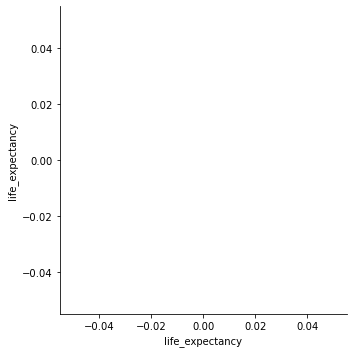

In [36]:
sns.relplot(data=gender_exp_df,x=male,y=female);

In [37]:
gender_exp_df

,area_id,area_code,city,gender,life_expectancy
0,E02000001,001,City of London,Male,91.100000
1,E02000002,001,Barking and Dagenham,Male,79.500000
2,E02000003,002,Barking and Dagenham,Male,78.100000
3,E02000004,003,Barking and Dagenham,Male,77.600000
4,E02000005,004,Barking and Dagenham,Male,79.200000
...,...,...,...,...,...
13577,E02006930,037,Greenwich,Female,82.800000
13578,E02006931,038,Greenwich,Female,83.900000
13579,E02006932,060,Liverpool,Female,78.700000
13580,E02006933,061,Liverpool,Female,84.300000


In [38]:
df = gender_exp_df.copy()

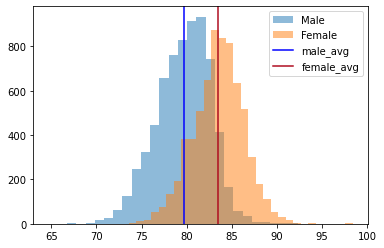

In [39]:
m_mean = df.query("gender == 'Male'")['life_expectancy'].mean()
f_mean = df.query("gender == 'Female'")['life_expectancy'].mean()

plt.hist(data=df.query("gender == 'Male'"), x='life_expectancy', bins=30, label='Male', alpha=0.5)
plt.hist(data=df.query("gender == 'Female'"), x='life_expectancy', bins=30, label='Female', alpha=0.5)
plt.axvline(x=m_mean, label = 'male_avg', color='blue')
plt.axvline(x=f_mean, label = 'female_avg', color='#AF0B1E')
plt.legend();

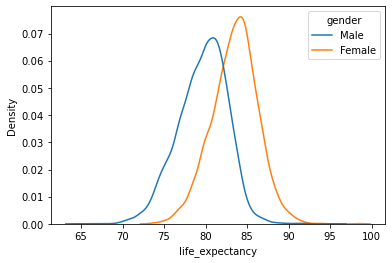

In [40]:
sns.kdeplot(data=df, x='life_expectancy', hue='gender');

In [41]:
grouped = df.groupby(['city', 'gender'])[['life_expectancy']].mean().reset_index()
grouped.head()

,city,gender,life_expectancy
0,Adur,Female,83.825000
1,Adur,Male,81.037500
2,Allerdale,Female,82.516667
3,Allerdale,Male,79.491667
4,Amber Valley,Female,83.081250


In [42]:
compare = expectancy_df.iloc[:, 2:]
compare = compare.groupby('city').mean()
compare['female_higher'] = compare.female_life_expectancy > compare.male_life_expectancy
print('Females have higher life expectancy than males in {} of the {} cities in the dataset'.format(compare.female_higher.sum(),compare.shape[0]))

Females have higher life expectancy than males in 325 of the 326 cities in the dataset


In [43]:
compare[compare.female_higher == False]

,male_life_expectancy,female_life_expectancy,female_higher
city,,,
City of London,91.1,90.2,False


In [44]:
england_life_expectancy=round(np.mean([f_mean,m_mean]),2)
england_life_expectancy

81.57

In [45]:
city_exp=gender_exp_df.groupby("city",as_index=False)["life_expectancy"].mean()
city_exp["above_average"]=city_exp.life_expectancy>england_life_expectancy


In [46]:
print('{} cities have life expectancy above the average life expectancy in England'.format(city_exp.query("above_average==True")['above_average'].count()))

193 cities have life expectancy above the average life expectancy in England


In [47]:
print('{} cities have life expectancy below the average life expectancy in England'.format(city_exp.query("above_average==False")['above_average'].count()))

133 cities have life expectancy below the average life expectancy in England


In [48]:
city_exp.above_average.value_counts()

True     193
False    133
Name: above_average, dtype: int64

In [49]:
city_exp.query("above_average==False")

,city,life_expectancy,above_average
1,Allerdale,81.004167,False
2,Amber Valley,81.456250,False
4,Ashfield,80.056250,False
8,Barking and Dagenham,80.176190,False
10,Barnsley,79.925000,False
...,...,...,...
318,Wolverhampton,79.407576,False
319,Worcester,81.250000,False
320,Worthing,81.546154,False
323,Wyre,80.460714,False


In [52]:
my_map=folium.Map(*/)

In [53]:
import plotly